# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №3: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

![](1.png)

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

![](2.png)

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

![](3.png)

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

![](4.png)

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

Штрафовать `w_0` не нужно. Это как бы смещение всей модели. При добавлении ко всем `y_i` фиксированного `h` `w_0` должен увеличиваться на этот же `h`, что в случае штрафа будет не так.

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
import random


def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    np.random.seed(0)
    n_samples, n_features = X.shape
    for _ in range(n_samples // batch_size):
        indices = np.random.randint(0, n_samples, batch_size)
        X_batch = X[indices]
        y_batch = y[indices]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
# my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):


def colors(n):
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    step = 256 / n
    for i in range(n):
        r += step
        g += step
        b += step
        r = int(r) % 256
        g = int(g) % 256
        b = int(b) % 256
        yield '#{:0>2x}{:0>2x}{:0>2x}'.format(r, g, b)


it = iter(colors(5))
for i in it:
    print(i)

#417a77
#74adaa
#a7e0dd
#da1310
#0d4643


In [7]:
from sklearn.base import BaseEstimator, ClassifierMixin
%pycodestyle_off

UsageError: Line magic function `%pycodestyle_off` not found.


In [8]:
def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


class MySGDClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, batch_generator, batch_size=1, C=0.001,
                 alpha=0.01, max_epoch=20, model_type='lin_reg',
                 threshold=0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : [],
                           'weights' : [], 'loss_grad' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        self.threshold=threshold
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        n_samples, n_features = X_batch.shape
        if self.model_type == 'lin_reg':
            loss = X_batch @ self.weights - y_batch
            loss = np.dot(loss, loss)
        elif self.model_type == 'log_reg':
            one = np.ones(n_samples)
            sigm = sigmoid(X_batch @ self.weights)
            loss = - np.dot(y_batch, np.log(sigm)) - \
                np.dot(one - y_batch, np.log(one - sigm)) 
            
        l2 = self.C * np.dot(self.weights[1:], self.weights[1:])
        loss += l2
        loss /= n_samples
        return loss

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        n_samples, n_features = X_batch.shape
        if self.model_type == 'lin_reg':
            loss_grad = 2 * X_batch.T @ (X_batch @ self.weights - y_batch)
            loss_grad[1:] = loss_grad[1:] + 2 * self.C * self.weights[1:] 
            loss_grad /= n_samples
        elif self.model_type == 'log_reg':
            sigm = sigmoid(X_batch @ self.weights)
            loss_grad = X_batch.T @ (sigm - y_batch)
            loss_grad[1:] = loss_grad[1:] + 2 * self.C * self.weights[1:]
            loss_grad /= n_samples
        self.errors_log['loss_grad'].append(loss_grad)
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha * new_grad
        pass
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        n_samples = X.shape[0]
        X = np.hstack((np.ones((n_samples, 1)), X))
        n_features = X.shape[1]
        # Нужно инициализровать случайно веса
        self.weights = np.random.randn(n_features)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y,
                                                       batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                self.errors_log['weights'].append(self.weights)
                
        self.coef_ = self.weights[1:].reshape(1, -1)
        self.intercept_ = self.weights[0].reshape(1)
        return self
    
    def decision_function(self, X):
        '''
        Предсказание расстояния до разделяющей гиперплоскости
        X - матрица объекты-признаки
        '''
        if self.model_type == 'lin_reg':
            y_hat = X @ self.weights[1:] + self.weights[0] - 0.5
        elif self.model_type == 'log_reg':
            y_hat = X @ self.weights[1:] + self.weights[0]
            
        return y_hat
    
    def predict_proba(self, X):
        '''
        Предсказание вероятности принадлежности к классy 1
        X - матрица объекты-признаки
        '''
        y_hat = sigmoid(self.decision_function(X))
        y_hat = y_hat.reshape(-1, 1)
        y_hat = np.hstack((1 - y_hat, y_hat))
        return y_hat
    
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        '''
        y_hat = (self.predict_proba(X)[:,1] > self.threshold).astype(int);
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [11]:
def plot_decision_boundary(clf, axes, xplot, color):
    yplot = - (xplot * clf.coef_[0, 0] + clf.intercept_ - 0.5) / clf.coef_[0, 1]
    axes.plot(xplot, yplot, c=color)

gauss1= (200, 2)
gauss2= (200, 2)


(-9, 3)

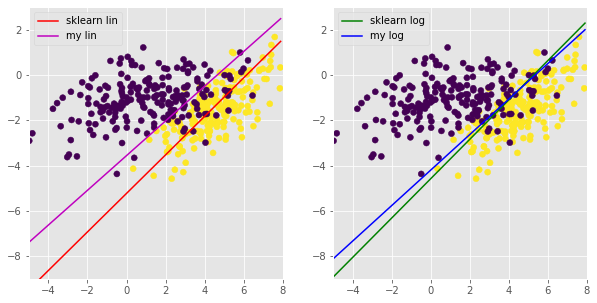

In [12]:
from sklearn.linear_model import SGDClassifier
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)
print('gauss1=', gauss1.shape)
print('gauss2=', gauss2.shape)
X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

xmin = np.floor(np.min(X[:,0]))
xmax = np.ceil(np.max(X[:,0]))
xplot = np.arange(xmin, xmax, 0.1)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.scatter(X[:,0], X[:,1], c=y)
ax2.scatter(X[:,0], X[:,1], c=y)

clf = SGDClassifier(loss='squared_loss', penalty='l2', alpha=0.01, \
                    n_iter_no_change=100).fit(X, y)
plot_decision_boundary(clf, ax, xplot, 'r')

clf = MySGDClassifier(batch_generator, batch_size=20, max_epoch=1000, \
                      model_type='lin_reg', alpha=0.001, C=0.01).fit(X, y)
plot_decision_boundary(clf, ax, xplot, 'm')

clf = SGDClassifier(loss='log', penalty='l2', alpha=0.01).fit(X, y)
plot_decision_boundary(clf, ax2, xplot, 'g')

clf = MySGDClassifier(batch_generator, batch_size=20, model_type='log_reg',
                     max_epoch=1000).fit(X, y)
plot_decision_boundary(clf, ax2, xplot, 'b')

ax.legend(['sklearn lin', 'my lin'])
ax2.legend(['sklearn log', 'my log'])
ax.set_xlim([-5, 8])
ax2.set_xlim([-5, 8])

ax.set_ylim([-9, 3])
ax2.set_ylim([-9, 3])

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [13]:
from sklearn.datasets import make_classification

In [14]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

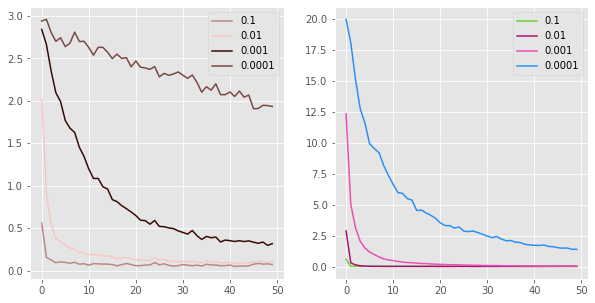

In [28]:
N = 100


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

alpha_ = [0.1, 0.01, 0.001, 0.0001]
for alpha, color in zip(alpha_, colors(len(alpha_))):
    clf = MySGDClassifier(batch_generator, batch_size=20, \
                          max_epoch=1, model_type='log_reg', alpha=alpha, C=0.001).fit(X, y)
    loss = clf.errors_log['loss']
    loss = [sum(loss[i*N:i*N+N+1]) / N for i in range(len(loss) // N)]
    ax.plot(np.array(loss), c=color)

ax.legend(alpha_)

for alpha, color in zip(alpha_, colors(len(alpha_))):
    clf = MySGDClassifier(batch_generator, batch_size=20, \
                          max_epoch=1, alpha=alpha, C=0.001).fit(X, y)
    loss = clf.errors_log['loss']
    loss = [sum(loss[i*N:i*N+N+1]) / N for i in range(len(loss) // N)]
    ax2.plot(np.array(loss), c=color)

ax2.legend(alpha_)

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

 Нужно начинать с больших `alpha` и постепенно уменьшать.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

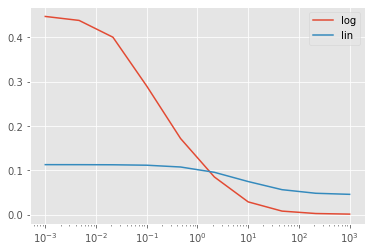

In [18]:
w_mean = []
CC = np.logspace(3, -3, 10)
for C, color in zip(CC, colors(10)):
    clf = MySGDClassifier(batch_generator, batch_size=5, max_epoch=1, \
                          model_type='log_reg', alpha=0.001, C=C).fit(X, y)
    mn = np.mean(np.abs(clf.weights))
    w_mean.append(mn)    
plt.plot(CC, w_mean)

w_mean = []
for C, color in zip(CC, colors(10)):
    clf = MySGDClassifier(batch_generator, batch_size=5, max_epoch=1, \
                          model_type='lin_reg', alpha=0.001, C=C).fit(X, y)
    mn = np.mean(np.abs(clf.weights))
    w_mean.append(mn)
plt.plot(CC, w_mean)
plt.xscale('log')
plt.legend(['log', 'lin'])

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

Да!

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [19]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))

28026


In [20]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [21]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [22]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

In [37]:
import string

def jaccard_dist(str1, str2): 
    a = str1.translate(str.maketrans('', '',
                                     string.punctuation + string.digits))
    a = set(a.lower().strip().split()) 
    b = str2.translate(str.maketrans('', '',
                                     string.punctuation + string.digits))
    b = b.translate(str.maketrans('', '', '1234567890'))
    b = set(b.lower().strip().split())
    
    c = a.intersection(b)
    if (len(a) + len(b) == 0):
        return 0
    else:
        return float(len(c)) / (len(a) + len(b) - len(c))
    
def get_data(filename):
    train_data = pd.read_csv(filename)
    traingroups_titledata = {}
    for i in range(len(train_data)):
        new_doc = train_data.iloc[i]
        doc_group = new_doc['group_id']
        doc_id = new_doc['doc_id']
        target = new_doc['target'] if 'target' in train_data else None
        title = doc_to_title[doc_id]
        if doc_group not in traingroups_titledata:
            traingroups_titledata[doc_group] = []
        traingroups_titledata[doc_group].append((doc_id, title, target))

    y_train = []
    X_train = []
    groups_train = []
    for new_group in traingroups_titledata:
        docs = traingroups_titledata[new_group]
        for k, (doc_id, title, target_id) in enumerate(docs):
            y_train.append(target_id)
            groups_train.append(new_group)
            all_dist = []
            for j in range(0, len(docs)):
                if k == j:
                    continue
                doc_id_j, title_j, target_j = docs[j]
                all_dist.append(jaccard_dist(title, title_j))
            X_train.append(sorted(all_dist, reverse=True)[0:10])
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    groups_train = np.array(groups_train)
    print (X_train.shape, y_train.shape, groups_train.shape)
    return X_train, y_train

X_test, _ = get_data('test_groups.csv')
X_train, y_train = get_data('train_groups.csv')
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

(16627, 10) (16627,) (16627,)
(11690, 10) (11690,) (11690,)


In [30]:
clf = MySGDClassifier(batch_generator, batch_size=10, model_type='lin_reg', \
                      C=1, \
                      alpha=0.001, \
                      max_epoch=4)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)

param_grid = [
  {
      'model_type': ['lin_reg', 'log_reg'],
      'C': [100, 10, 1],
      'alpha': [0.01, 0.001, 0.0001],
      'max_epoch': [2, 3, 4, 5],
      'threshold': np.arange(0.4, 0.6, 0.1)}
 ]

gs = GridSearchCV(clf, param_grid, scoring='f1', cv=rs)
gs.fit(X_train, y_train)

score = gs.cv_results_['mean_test_score']
imax = np.argmax(np.array(gs.cv_results_['mean_test_score']))

In [32]:
for param in param_grid[0]:
    value = gs.cv_results_['param_' + param][imax]
    print(param, value)
    setattr(clf, param, value)
    

model_type log_reg
C 10
alpha 0.001
max_epoch 2
threshold 0.4


In [35]:
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

source = pd.read_csv('test_groups.csv')
df = pd.DataFrame()
df['pair_id'] = source['pair_id']
df['target'] = y_pred
df.to_csv('hw2.csv', index=False)

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***